<a href="https://colab.research.google.com/github/tutalae/BTC/blob/master/5Forex_Uncorr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

How to create a stock correlation matrix in python
from
https://medium.com/analytics-vidhya/how-to-create-a-stock-correlation-matrix-in-python-4f32f8cb5b50

In [1]:
#Import the libraries
import numpy as np 
import pandas as pd 
# Used to grab the stock prices, with yahoo 
import pandas_datareader as web 
from datetime import datetime 
# To visualize the results 
import matplotlib.pyplot as plt 
import seaborn

In [2]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

print(tf.__version__)

2.5.0


In [3]:
#Select the list of tickers and select the daterange
start = datetime(2012, 1, 1)
symbols_list = ['EURUSD=X', 'USDJPY=X', 'GBPUSD=X',"AUDUSD=X" , 'USDCAD=X', 'USDCHF=X', 'NZDUSD=X', 'EURJPY=X', 'GBPJPY=X', 
                'EURGBP=X', 'AUDJPY=X']
#array to store prices
symbols=[]

In [4]:
#Pull stock prices, push into clean dataframe
#array to store prices
symbols=[]
for ticker in symbols_list:     
    r = web.DataReader(ticker, 'yahoo', start)   
    # add a symbol column   
    r['Symbol'] = ticker    
    symbols.append(r)
# concatenate into df
df = pd.concat(symbols)
df = df.reset_index()
df = df[['Date', 'Close', 'Symbol']]
df.bfill(inplace=True)

df.head()
df_pivot=df.pivot('Date','Symbol','Close').reset_index()
df_pivot.head()

Symbol,Date,AUDJPY=X,AUDUSD=X,EURGBP=X,EURJPY=X,EURUSD=X,GBPJPY=X,GBPUSD=X,NZDUSD=X,USDCAD=X,USDCHF=X,USDJPY=X
0,2012-01-02,78.419998,1.020804,0.8331,99.610001,1.296008,119.519997,1.551205,0.778695,1.0209,0.9381,77.019997
1,2012-01-03,78.853104,1.025399,0.8336,99.531998,1.294096,119.370003,1.552000,0.781006,1.0174,0.9394,76.930000
2,2012-01-04,79.540001,1.037000,0.8342,100.146004,1.305602,120.010002,1.564407,0.790389,1.0111,0.9319,76.722000
3,2012-01-05,79.290001,1.034126,0.8284,99.190002,1.293142,119.703003,1.560939,0.786596,1.0134,0.9421,76.709999
4,2012-01-06,79.098701,1.025704,0.8252,98.707001,1.279607,119.570000,1.550171,0.781189,1.0196,0.9521,77.151001


In [5]:
df.isna().sum()

Date      0
Close     0
Symbol    0
dtype: int64

In [6]:
#Now, we can run the correlation. Using the Pandas ‘corr’ function to compute the Pearson correlation coeffecient between each pair of equities
corr_df = df_pivot.corr(method='pearson')
#reset symbol as index (rather than 0-X)
corr_df.head().reset_index()
#del corr_df.index.name
corr_df.head(10)

Symbol,AUDJPY=X,AUDUSD=X,EURGBP=X,EURJPY=X,EURUSD=X,GBPJPY=X,GBPUSD=X,NZDUSD=X,USDCAD=X,USDCHF=X,USDJPY=X
Symbol,,,,,,,,,,,
AUDJPY=X,1.000000,0.560165,-0.469264,0.556916,0.531952,0.663167,0.709598,0.707589,-0.570430,-0.335200,0.065495
AUDUSD=X,0.560165,1.000000,-0.217731,-0.253823,0.824703,-0.094136,0.769554,0.914785,-0.968393,-0.516179,-0.785171
EURGBP=X,-0.469264,-0.217731,1.000000,-0.135652,0.006117,-0.680298,-0.641165,-0.219454,0.219194,0.020158,-0.142995
EURJPY=X,0.556916,-0.253823,-0.135652,1.000000,0.122711,0.816090,0.185331,0.029495,0.157517,-0.173539,0.689300
EURUSD=X,0.531952,0.824703,0.006117,0.122711,1.000000,0.050456,0.762627,0.863709,-0.872154,-0.747650,-0.632918
GBPJPY=X,0.663167,-0.094136,-0.680298,0.816090,0.050456,1.000000,0.482524,0.112832,0.022963,-0.124847,0.618284
GBPUSD=X,0.709598,0.769554,-0.641165,0.185331,0.762627,0.482524,1.000000,0.800921,-0.808171,-0.590927,-0.389637
NZDUSD=X,0.707589,0.914785,-0.219454,0.029495,0.863709,0.112832,0.800921,1.000000,-0.907997,-0.603407,-0.597349
USDCAD=X,-0.570430,-0.968393,0.219194,0.157517,-0.872154,0.022963,-0.808171,-0.907997,1.000000,0.573981,0.747107


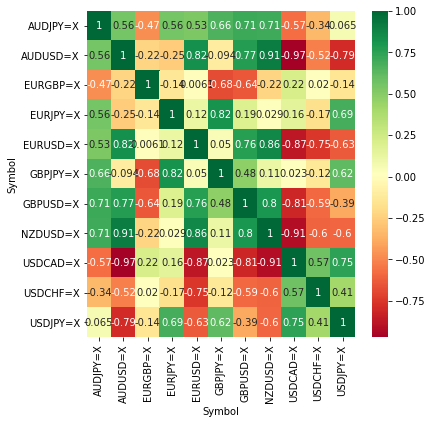

In [358]:
# Finally, we can plot a heatmap of the correlations (with Seaborn and Matplotlib) to better visualize the results:
fig, ax = plt.subplots(figsize=(6,6)) 
ax = seaborn.heatmap(corr_df, annot=True, cmap="RdYlGn")

In [7]:
corr_df.min()

Symbol
AUDJPY=X   -0.570430
AUDUSD=X   -0.968393
EURGBP=X   -0.680298
EURJPY=X   -0.253823
EURUSD=X   -0.872154
GBPJPY=X   -0.680298
GBPUSD=X   -0.808171
NZDUSD=X   -0.907997
USDCAD=X   -0.968393
USDCHF=X   -0.747650
USDJPY=X   -0.785171
dtype: float64

max 
1. USDCAD=X , AUDUSD=X =  -0.968393
2. NZDUSD=X   -0.907996
3. EURUSD=X   -0.872155
4. GBPUSD=X   -0.808171
5. USDCHF=X   -0.747646



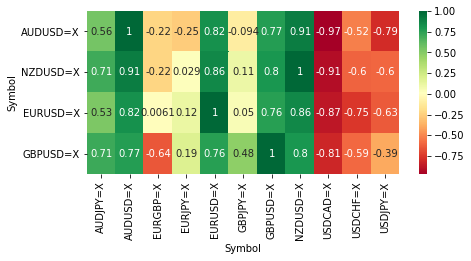

In [360]:
# 1. USDCAD=X , AUDUSD=X = -0.968393
uncorr1 = corr_df.nlargest(4, "AUDUSD=X")
fig, ax = plt.subplots(figsize=(7,3)) 
ax = seaborn.heatmap(uncorr1, annot=True, cmap="RdYlGn")

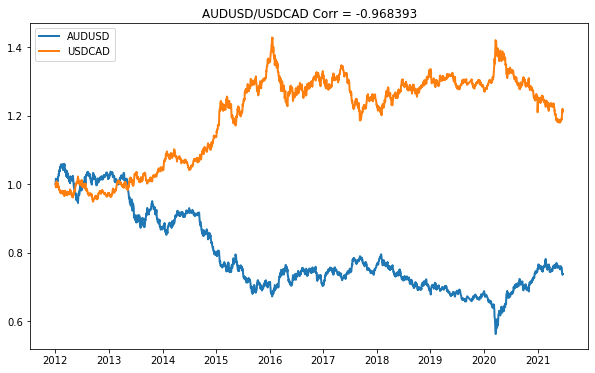

In [361]:
fig, ax = plt.subplots(figsize=(10,6)) 

d = df_pivot["Date"]
t = df_pivot["AUDUSD=X"]/df_pivot["AUDUSD=X"].iloc[0]
s = df_pivot["USDCAD=X"]/df_pivot["USDCAD=X"].iloc[0]

plt.title("AUDUSD/USDCAD Corr = -0.968393")
line, = plt.plot(d, t, lw=2, label='AUDUSD')
line, = plt.plot(d, s, lw=2, label='USDCAD')
plt.legend()
plt.show()

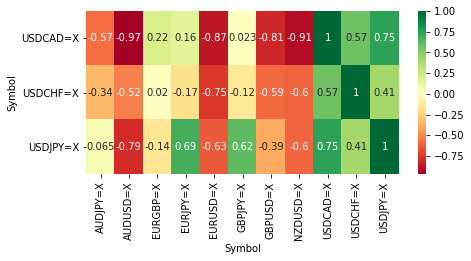

In [362]:
# 2. NZDUSD=X -0.907996
uncorr2 = corr_df.nsmallest(3, "NZDUSD=X")
fig, ax = plt.subplots(figsize=(7,3)) 
ax = seaborn.heatmap(uncorr2, annot=True, cmap="RdYlGn")

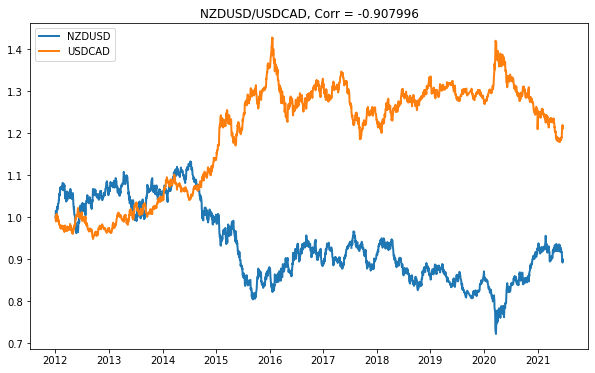

In [363]:
fig, ax = plt.subplots(figsize=(10,6)) 

d = df_pivot["Date"]
t = df_pivot["NZDUSD=X"]/df_pivot["NZDUSD=X"].iloc[0]
s = df_pivot["USDCAD=X"]/df_pivot["USDCAD=X"].iloc[0]

plt.title("NZDUSD/USDCAD, Corr = -0.907996")
line, = plt.plot(d, t, lw=2, label='NZDUSD')
line, = plt.plot(d, s, lw=2, label='USDCAD')
plt.legend()
plt.show()

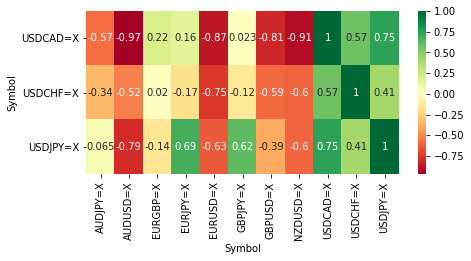

In [364]:
# 3. EURUSD=X -0.872155
uncorr3 = corr_df.nsmallest(3, "EURUSD=X")
fig, ax = plt.subplots(figsize=(7,3)) 
ax = seaborn.heatmap(uncorr3, annot=True, cmap="RdYlGn")

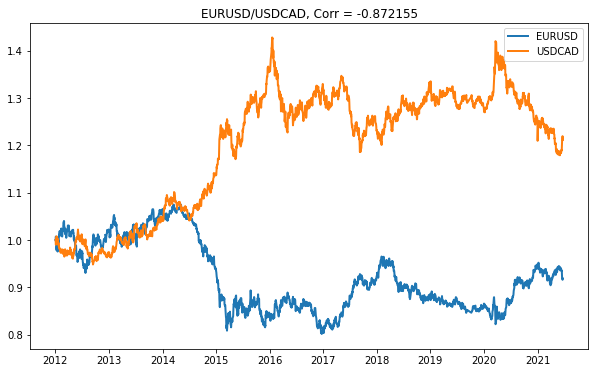

In [365]:
fig, ax = plt.subplots(figsize=(10,6)) 

d = df_pivot["Date"]
t = df_pivot["EURUSD=X"]/df_pivot["EURUSD=X"].iloc[0]
s = df_pivot["USDCAD=X"]/df_pivot["USDCAD=X"].iloc[0]

plt.title("EURUSD/USDCAD, Corr = -0.872155")
line, = plt.plot(d, t, lw=2, label='EURUSD')
line, = plt.plot(d, s, lw=2, label='USDCAD')
plt.legend()
plt.show()

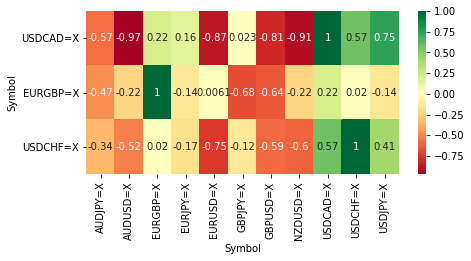

In [366]:
# 4. GBPUSD=X -0.808171
uncorr4 = corr_df.nsmallest(3, "GBPUSD=X")
fig, ax = plt.subplots(figsize=(7,3)) 
ax = seaborn.heatmap(uncorr4, annot=True, cmap="RdYlGn")

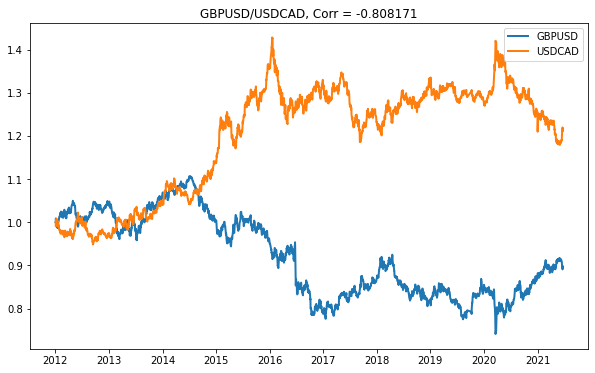

In [367]:
fig, ax = plt.subplots(figsize=(10,6)) 

d = df_pivot["Date"]
t = df_pivot["GBPUSD=X"]/df_pivot["GBPUSD=X"].iloc[0]
s = df_pivot["USDCAD=X"]/df_pivot["USDCAD=X"].iloc[0]

plt.title("GBPUSD/USDCAD, Corr = -0.808171")
line, = plt.plot(d, t, lw=2, label='GBPUSD')
line, = plt.plot(d, s, lw=2, label='USDCAD')
plt.legend()
plt.show()

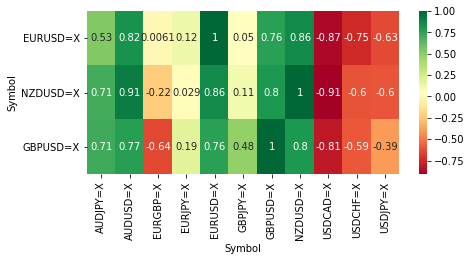

In [368]:
# 5. USDCHF=X -0.747646
uncorr5 = corr_df.nsmallest(3, "USDCHF=X")
fig, ax = plt.subplots(figsize=(7,3)) 
ax = seaborn.heatmap(uncorr5, annot=True, cmap="RdYlGn")


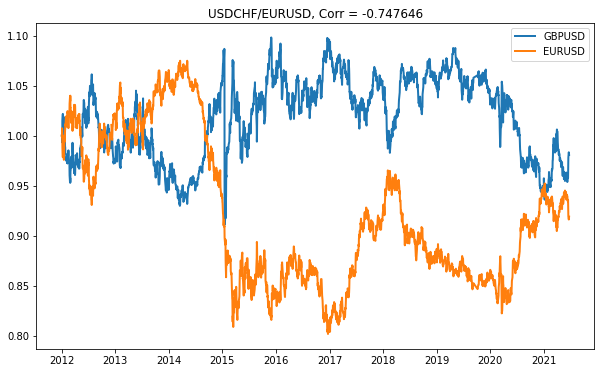

In [369]:
fig, ax = plt.subplots(figsize=(10,6)) 

d = df_pivot["Date"]
t = df_pivot["USDCHF=X"]/df_pivot["USDCHF=X"].iloc[0]
s = df_pivot["EURUSD=X"]/df_pivot["EURUSD=X"].iloc[0]

plt.title("USDCHF/EURUSD, Corr = -0.747646")
line, = plt.plot(d, t, lw=2, label='GBPUSD')
line, = plt.plot(d, s, lw=2, label='EURUSD')
plt.legend()
plt.show()

In [8]:
#XAUUSD - USDCHF	-94.1%

In [9]:
dataset = df_pivot.copy()

In [10]:
dataset.bfill(inplace=True)
dataset.isna().sum()

Symbol
Date        0
AUDJPY=X    0
AUDUSD=X    0
EURGBP=X    0
EURJPY=X    0
EURUSD=X    0
GBPJPY=X    0
GBPUSD=X    0
NZDUSD=X    0
USDCAD=X    0
USDCHF=X    0
USDJPY=X    0
dtype: int64

In [11]:
dataset.columns

Index(['Date', 'AUDJPY=X', 'AUDUSD=X', 'EURGBP=X', 'EURJPY=X', 'EURUSD=X',
       'GBPJPY=X', 'GBPUSD=X', 'NZDUSD=X', 'USDCAD=X', 'USDCHF=X', 'USDJPY=X'],
      dtype='object', name='Symbol')

In [12]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

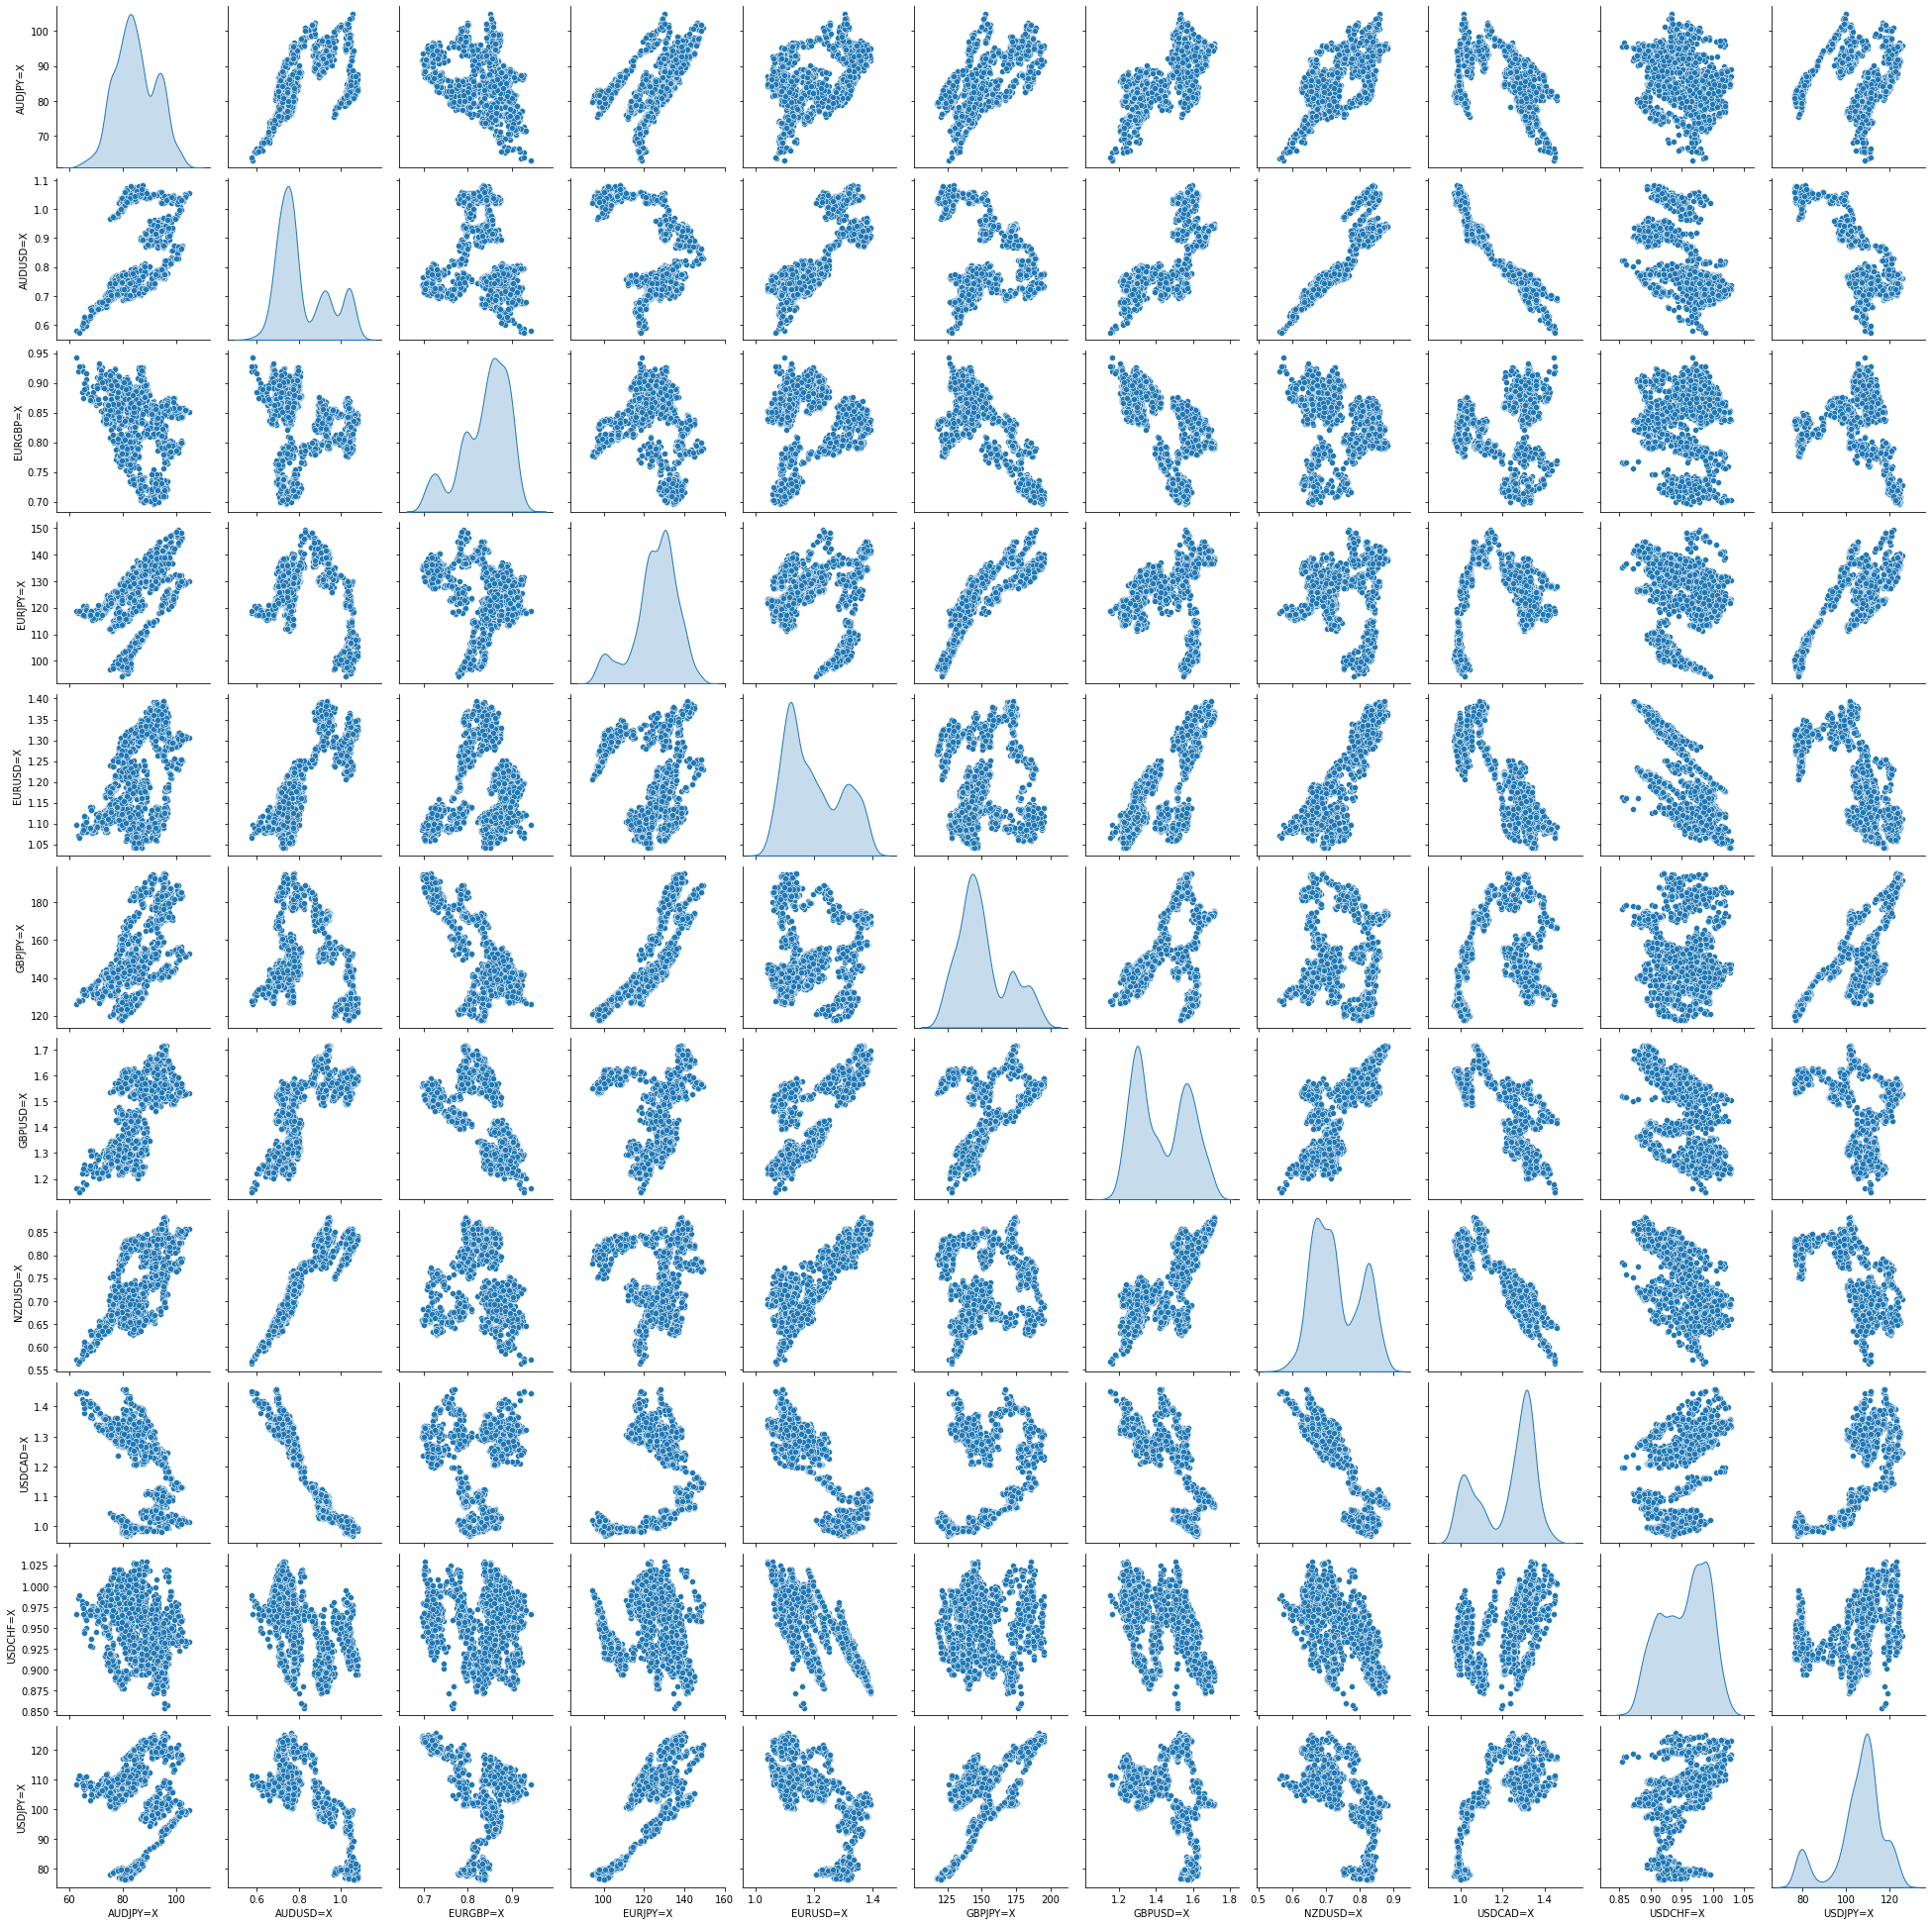

In [13]:
seaborn.pairplot(train_dataset[['AUDJPY=X', 'AUDUSD=X', 'EURGBP=X', 'EURJPY=X', 'EURUSD=X',
       'GBPJPY=X', 'GBPUSD=X', 'NZDUSD=X', 'USDCAD=X', 'USDCHF=X', 'USDJPY=X']], diag_kind='kde')

In [14]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Symbol,,,,,,,,
AUDJPY=X,1961.0,84.813807,7.622374,62.917999,79.434998,84.120003,91.295998,105.016998
AUDUSD=X,1961.0,0.813186,0.120548,0.574290,0.722961,0.766812,0.913993,1.080777
EURGBP=X,1961.0,0.838673,0.053535,0.695700,0.803000,0.851570,0.879610,0.942500
EURJPY=X,1961.0,125.688339,10.820803,94.209999,120.739998,127.350998,132.759995,149.440994
EURUSD=X,1961.0,1.196314,0.094845,1.040583,1.118356,1.175102,1.285843,1.393068
GBPJPY=X,1961.0,150.620521,18.153485,117.650002,138.406998,146.266006,160.949997,195.274994
GBPUSD=X,1961.0,1.432158,0.144711,1.149439,1.300965,1.410417,1.564407,1.716090
NZDUSD=X,1961.0,0.731800,0.070719,0.562610,0.674059,0.717829,0.800705,0.882379
USDCAD=X,1961.0,1.219726,0.131693,0.968270,1.089230,1.275840,1.322510,1.457800


In [15]:
train_dataset.columns

Index(['Date', 'AUDJPY=X', 'AUDUSD=X', 'EURGBP=X', 'EURJPY=X', 'EURUSD=X',
       'GBPJPY=X', 'GBPUSD=X', 'NZDUSD=X', 'USDCAD=X', 'USDCHF=X', 'USDJPY=X'],
      dtype='object', name='Symbol')

In [16]:
train_features = train_dataset.pop('AUDUSD=X')
test_features = test_dataset.pop('AUDUSD=X')

train_labels = train_dataset.copy().pop('USDCAD=X')
test_labels = test_dataset.copy().pop('USDCAD=X')

In [17]:
#Normalization
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
Symbol,,
AUDJPY=X,84.813807,7.622374
EURGBP=X,0.838673,0.053535
EURJPY=X,125.688339,10.820803
EURUSD=X,1.196314,0.094845
GBPJPY=X,150.620521,18.153485
GBPUSD=X,1.432158,0.144711
NZDUSD=X,0.731800,0.070719
USDCAD=X,1.219726,0.131693
USDCHF=X,0.954536,0.037426


In [18]:
normalizer = preprocessing.Normalization(axis=-1)

In [19]:
normalizer.adapt(np.array(train_features))

In [20]:
print(normalizer.mean.numpy())

[0.8131864]


In [21]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [1.03]

Normalized: [[1.8]]


In [22]:
horsepower = np.array(train_features)

horsepower_normalizer = preprocessing.Normalization(input_shape=[1,], axis=None)
horsepower_normalizer.adapt(horsepower)

In [23]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [24]:
dnn_horsepower_model = build_and_compile_model(horsepower_normalizer)

In [25]:
dnn_horsepower_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_1 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense (Dense)                (None, 64)                128       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


In [26]:
%%time
history = dnn_horsepower_model.fit(
    train_features, train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 8.69 s, sys: 712 ms, total: 9.4 s
Wall time: 7.68 s


In [27]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,0.019567,0.020077,95
96,0.019818,0.020647,96
97,0.020144,0.022159,97
98,0.021057,0.021823,98
99,0.020236,0.021202,99


In [28]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 0.04])
  plt.xlabel('Epoch')
  plt.ylabel('Error [Price]')
  plt.legend()
  plt.grid(True)

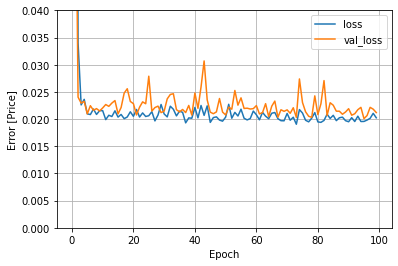

In [29]:
plot_loss(history)

In [30]:
def plot_horsepower(x, y):
  plt.scatter(train_features, train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Horsepower')
  plt.ylabel('MPG')
  plt.legend()

In [31]:
x = tf.linspace(0.4, 1.2, 200)
y = dnn_horsepower_model.predict(x)

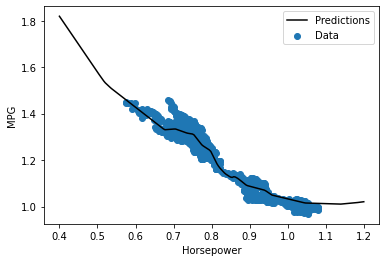

In [32]:
plot_horsepower(x, y)

In [33]:
test_results = {}

test_results['dnn_horsepower_model'] = dnn_horsepower_model.evaluate(
    test_features,
    test_labels, verbose=0)

In [34]:
pd.DataFrame(test_results, index=['Mean absolute error [Price]']).T

,Mean absolute error [Price]
dnn_horsepower_model,0.018857


In [35]:
y = dnn_horsepower_model.predict([.752, .6])
y

array([[1.3110775],
       [1.427506 ]], dtype=float32)